In [ ]:
# KUC, NLP

2. LDiA

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# original data
sms = pd.read_csv('data/sms-spam.csv',usecols= ['spam','text'])
print(sms.head())

   spam                                               text
0     0  Go until jurong point, crazy.. Available only ...
1     0                      Ok lar... Joking wif u oni...
2     1  Free entry in 2 a wkly comp to win FA Cup fina...
3     0  U dun say so early hor... U c already then say...
4     0  Nah I don't think he goes to usf, he lives aro...


In [5]:
# processed
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]  # <2>
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
mask = sms.spam.astype(bool).values
sms['spam'] = sms.spam.astype(int)

print(sms.head())

       spam                                               text
sms0      0  Go until jurong point, crazy.. Available only ...
sms1      0                      Ok lar... Joking wif u oni...
sms2!     1  Free entry in 2 a wkly comp to win FA Cup fina...
sms3      0  U dun say so early hor... U c already then say...
sms4      0  Nah I don't think he goes to usf, he lives aro...


In [8]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize.casual import casual_tokenize

n_samples = 4837 # len(sms)
n_features = 1000 # tfidf.shape[1]
n_components = 10
n_top_words = 20
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(sms.text)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()


In [13]:
print(tfidf_feature_names[:20])

['00' '000' '02' '03' '04' '06' '0800' '08000839402' '08000930705' '0870'
 '10' '100' '1000' '10p' '11' '11mths' '12' '12hrs' '150' '150p']


In [10]:
#
lda_model = LatentDirichletAllocation(n_components)
topics = lda_model.fit_transform(tfidf)

top_terms = 20
TOTAL_TOPICS = 20
vocabulary = np.array(tfidf_vectorizer.get_feature_names_out())
topic_terms = lda_model.components_

In [11]:
print(topic_terms.shape)
print(topic_terms[:top_terms])

(10, 1000)
[[0.10004004 5.43352612 0.10002146 ... 3.03799327 0.55070638 0.12080451]
 [0.1        0.10000007 0.10001152 ... 0.10002002 0.10001174 0.10002653]
 [3.20429876 0.10000032 0.10001005 ... 0.10001013 0.1        0.10000409]
 ...
 [0.1        1.43666375 0.10000328 ... 0.10000236 0.1        0.10000295]
 [0.10000522 1.27481832 2.02740623 ... 0.76043905 0.10000714 0.10000126]
 [0.10000001 0.10000001 0.10000059 ... 0.10000001 0.1        0.10000044]]


In [14]:
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:, :top_terms]
topic_keyterms = vocabulary[topic_key_term_idxs]

In [15]:
print(topic_keyterms)
print(topic_keyterms[0])

[['ok' 'free' 'claim' 'txt' 'won' 'prize' 'message' 'mobile' 'text'
  'cash' 'urgent' 'www' 'stop' 'new' 'guaranteed' '1000' 'enjoy' 'ur'
  '50' 'service']
 ['lor' 'll' 'later' 'sorry' 'ok' 'going' 'wat' 'work' 'doing' 'tonight'
  'tomorrow' 'come' 'coming' 'wan' 'dun' 'meeting' 'home' 'thk' 'ill'
  'said']
 ['ur' 'happy' 'thanx' 'waiting' 'hope' 'year' 'new' 'sir' 'dear' 'week'
  've' 'just' 'best' 'told' 'thank' 'gud' 'number' 'jus' 'wish' 'true']
 ['yup' 'use' 'late' 'hey' 'im' 'plan' 'thought' 'food' 'means' 'dad'
  'online' 'win' 'didn' 'mail' 'chance' 'huh' '100' 'details' 'isn' 'ur']
 ['gt' 'lt' 'good' 'need' 'babe' 'morning' 'gonna' 'tell' 'cool' 'night'
  'thats' 'sleep' 'just' 'amp' 'day' 'abt' 'bed' 'shall' 'thanks' 'll']
 ['oh' 'right' 'getting' 'home' 'way' 'sent' 'nice' 'know' 'ur' 'house'
  'chat' 'wont' 'god' 'hello' 'guys' 'thinking' 'just' 'meet' 'haha'
  'let']
 ['love' 'think' 'great' 'did' 'talk' 'day' 'help' 'sure' 'lot'
  'princess' 'days' 'miss' 'life' 'fuck' 'p

In [16]:
# topics = [', '.join(topic) for topic in topic_keyterms]

In [17]:
print(topics.shape)

(4837, 10)


In [18]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame(topics)
print(topics_df.head(5))


          0         1         2         3         4         5         6  \
0  0.027755  0.119942  0.027733  0.027727  0.027730  0.027730  0.658193   
1  0.037062  0.037045  0.037026  0.037022  0.037024  0.037021  0.037024   
2  0.021903  0.021889  0.021890  0.475272  0.021890  0.349575  0.021904   
3  0.037537  0.662150  0.037537  0.037539  0.037546  0.037538  0.037541   
4  0.031258  0.031258  0.031259  0.031260  0.031256  0.031263  0.374784   

          7         8         9  
0  0.027728  0.027727  0.027735  
1  0.037027  0.666725  0.037024  
2  0.021895  0.021890  0.021892  
3  0.037537  0.037537  0.037539  
4  0.031259  0.375133  0.031269  


/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_12296/202962680.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [19]:
# another implementation with more visualization

lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [22]:
import matplotlib.pyplot as plt
# plot_top_words, see sklearn documentation: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

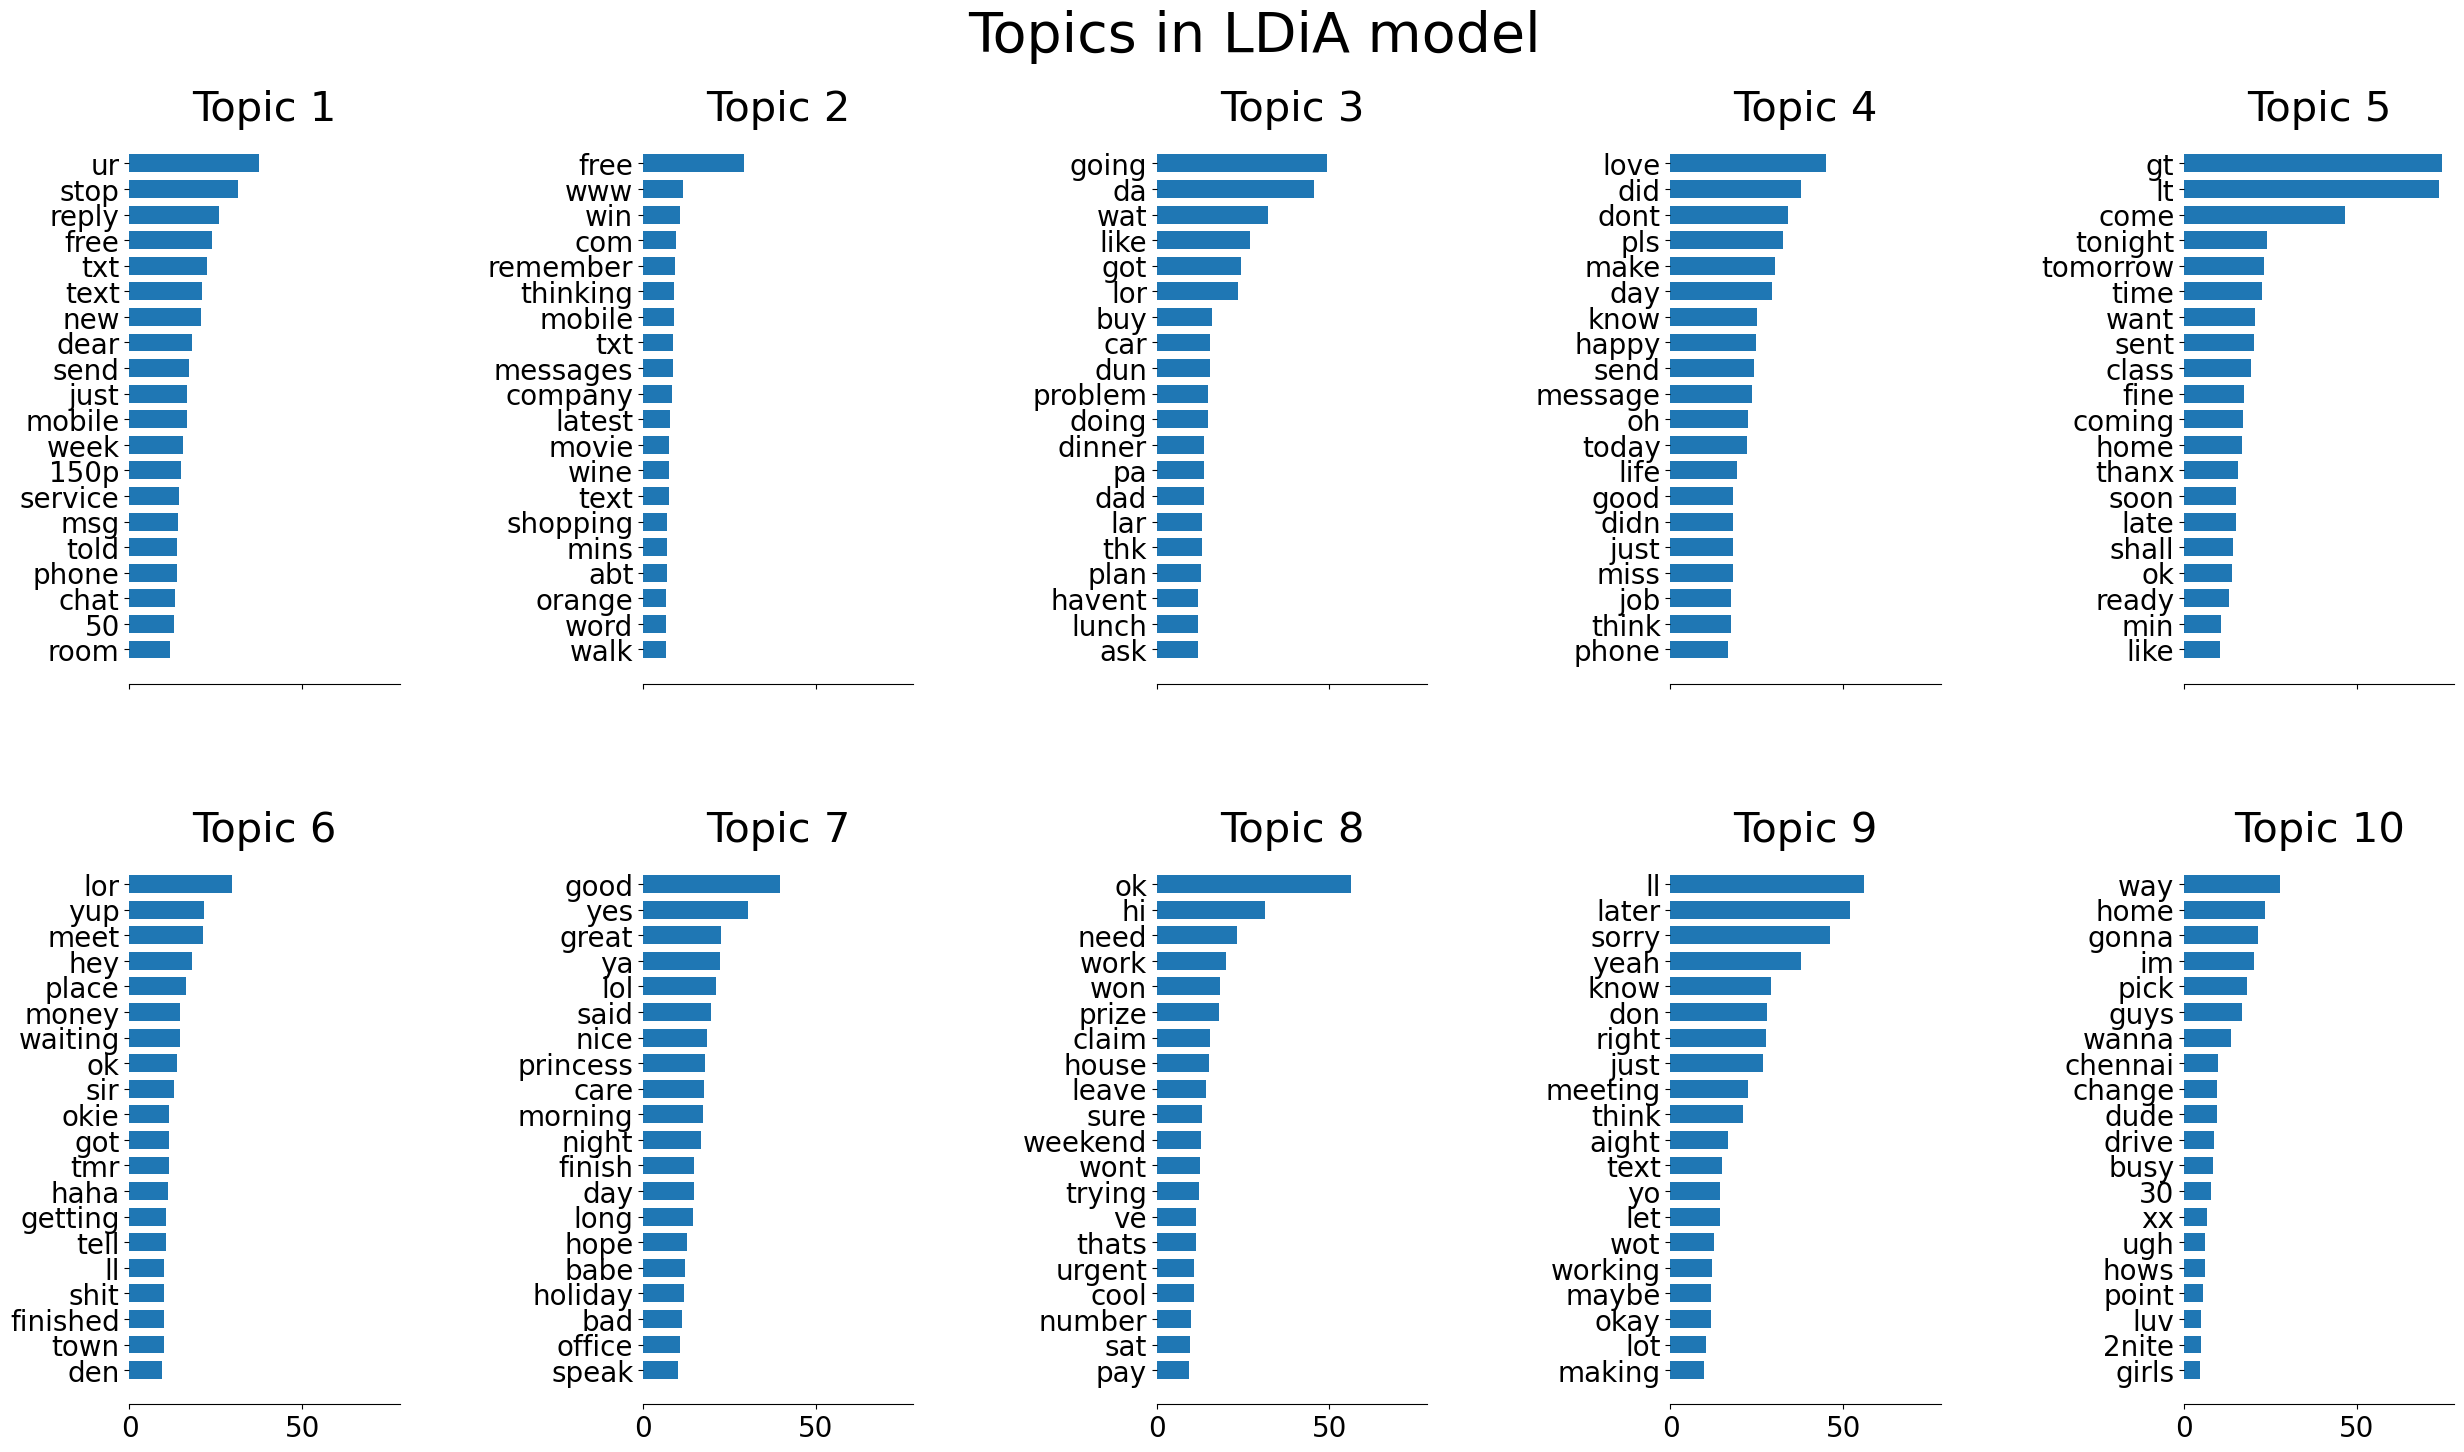

In [24]:
%matplotlib inline
plot_top_words(lda, tfidf_feature_names, n_top_words, "Topics in LDiA model")